In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('../datafiles/CO_2014_2015.csv')
df.head()

,Age,StateProvinceCode,CustomerLifetimeSpend,Customer1YearSpend,Customer3YearSpend,ThreeYearVisitCount,SkiLoyaltyIndexRating,FrontRangeMarket,CustId,Spend_Winter_2010,...,April_15,November_14,December_14,Total_Days_14_15,Total_Days_13_14,Ski_Resort1_2014_2015,Ski_Resort2_2014_2015,Ski_Resort3_2014_2015,Ski_Resort4_2014_2015,Ski_Resort5_2014_2015
0,42,CO,55.61,0.0,42.43,19,10.0,1,1073873,0.0,...,0,0,1,7,0,0,0,0,0,7
1,48,CO,139.00,0.0,139.00,24,0.0,1,1073874,0.0,...,0,0,0,2,2,0,0,2,0,0
2,48,CO,428.00,0.0,0.00,13,0.0,1,1073876,59.0,...,0,0,0,2,4,0,0,1,0,1
3,33,CO,449.00,0.0,0.00,0,0.0,0,1073942,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24,CO,148.19,0.0,148.19,2,0.0,1,1073956,0.0,...,0,1,0,4,0,0,0,0,0,4


In [4]:
cols = ['Age', 'CustomerLifetimeSpend',
       #'Customer1YearSpend', 
       'Customer3YearSpend', 'ThreeYearVisitCount',
       'SkiLoyaltyIndexRating', 'FrontRangeMarket',
       'Spend_Winter_2010', 'Spend_Winter_2011', 'Spend_Winter_2012',
       'Spend_Winter_2013', 'Spend_Winter_2014', #'Spend_Winter_2015',
       #'Household1YearSpend',
       'Household3YearSpend', 'HouseholdLifetimeSpend',
       'NumberOfHouseholdMembers', 'NumberOfAdults',
       'NumberOfChildren', 'Pass_Winter_2010', 'Pass_Winter_2011',
       'Pass_Winter_2012', 'Pass_Winter_2013', 'Pass_Winter_2014',
       'Early_Purchase_2014_2015', 'Regular_Purchase_2014_2015',
       'Late_Purchase_2014_2015', 'Super_Late_Purchase_2014_2015', 'January_15', 'February_15', 'March_15',
       'April_15', 'November_14', 'December_14', 'Total_Days_14_15', 'Total_Days_13_14', 
       'Ski_Resort1_2014_2015',
       'Ski_Resort2_2014_2015', 'Ski_Resort3_2014_2015', 'Ski_Resort4_2014_2015', 'Ski_Resort5_2014_2015']

In [53]:
cols = ['ThreeYearVisitCount', 'Customer3YearSpend', 'Age', 'Total_Days_14_15', 'Pass_Winter_2014']

In [35]:
cols = ['Customer3YearSpend', 'Total_Days_14_15']

In [41]:
X = df[cols]#.head(10000)

In [6]:
df.shape

(139616, 45)

In [5]:
X = df[cols]
y = df['Pass_Winter_2015']

In [65]:
y.mean()

0.4682128122851249

In [7]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [8]:
y_train.mean()

0.46732943693177476

In [9]:
y_test.mean()

0.47086293834517534

In [10]:
ss = StandardScaler()

# Fit Scaler on X_train data from TTS
ss.fit(X_train)
# Transform X_Train data from TTS
X_train_s = ss.transform(X_train)
#Transform X_test from TTS
X_test_s = ss.transform(X_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/Users/craigstrong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


## Keras Model

In [18]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(10, activation='relu')) # First step in tuning by adding hidden layers to the NN

# For all regression problems, the output layer
# is 1 neuron
# with no activation function
model.add(Dense(1, activation='sigmoid')) # output layer

## Compiling Model

In [21]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Fitting Model

In [30]:
results = model.fit(X_train_s, y_train, 
          epochs=100, 
          validation_data=(X_test_s, y_test))

Train on 104712 samples, validate on 34904 samples
Epoch 1/100
104712/104712 [==============================] - 8s 78us/step - loss: 0.3953 - acc: 0.8211 - val_loss: 0.4006 - val_acc: 0.8182
Epoch 2/100
104712/104712 [==============================] - 6s 61us/step - loss: 0.3951 - acc: 0.8216 - val_loss: 0.4024 - val_acc: 0.8176
Epoch 3/100
104712/104712 [==============================] - 7s 64us/step - loss: 0.3948 - acc: 0.8212 - val_loss: 0.4030 - val_acc: 0.8149
Epoch 4/100
104712/104712 [==============================] - 7s 65us/step - loss: 0.3944 - acc: 0.8205 - val_loss: 0.4021 - val_acc: 0.8174
Epoch 5/100
104712/104712 [==============================] - 7s 65us/step - loss: 0.3948 - acc: 0.8214 - val_loss: 0.4015 - val_acc: 0.8179
Epoch 6/100
104712/104712 [==============================] - 7s 66us/step - loss: 0.3940 - acc: 0.8214 - val_loss: 0.4003 - val_acc: 0.8180
Epoch 7/100
104712/104712 [==============================] - 7s 70us/step - loss: 0.3933 - acc: 0.8219 - val_

Epoch 59/100
104712/104712 [==============================] - 6s 58us/step - loss: 0.3817 - acc: 0.8273 - val_loss: 0.3910 - val_acc: 0.8249
Epoch 60/100
104712/104712 [==============================] - 6s 61us/step - loss: 0.3815 - acc: 0.8271 - val_loss: 0.3913 - val_acc: 0.8243
Epoch 61/100
104712/104712 [==============================] - 6s 56us/step - loss: 0.3814 - acc: 0.8270 - val_loss: 0.3920 - val_acc: 0.8253
Epoch 62/100
104712/104712 [==============================] - 5s 52us/step - loss: 0.3815 - acc: 0.8272 - val_loss: 0.3909 - val_acc: 0.8260
Epoch 63/100
104712/104712 [==============================] - 6s 60us/step - loss: 0.3812 - acc: 0.8278 - val_loss: 0.3921 - val_acc: 0.8236
Epoch 64/100
104712/104712 [==============================] - 7s 66us/step - loss: 0.3816 - acc: 0.8271 - val_loss: 0.3925 - val_acc: 0.8246
Epoch 65/100
104712/104712 [==============================] - 7s 64us/step - loss: 0.3812 - acc: 0.8269 - val_loss: 0.3942 - val_acc: 0.8238
Epoch 66/100


## Making Predictions

In [35]:
predictions = model.predict(X_test_s)
predictions = (predictions > 0.5)

             precision    recall  f1-score   support

          0       0.84      0.83      0.83     18469
          1       0.81      0.82      0.81     16435

avg / total       0.82      0.82      0.82     34904



Text(0.5,15,'Predicted label')

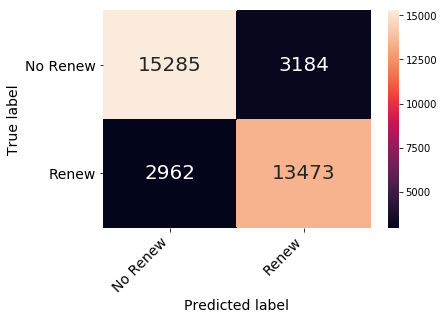

In [36]:
confusion_matrix_NN = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
 
confusion_matrix_df = pd.DataFrame(confusion_matrix_NN, ('No Renew', 'Renew'), ('No Renew', 'Renew'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

## Plot Losses

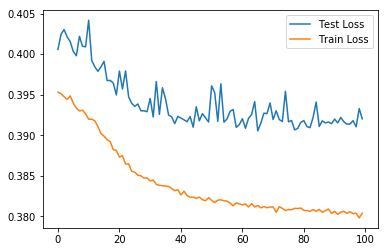

In [31]:
plt.plot(results.history['val_loss'], label='Test Loss')
plt.plot(results.history['loss'], label='Train Loss')
plt.legend()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [56]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [ ]:
 figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()